In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Create path

train_loc = '/content/drive/MyDrive/Colab Notebooks/new/train'
test_loc = '/content/drive/MyDrive/Colab Notebooks/new/test'


In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LSTM, merge
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.utils import Sequence
from tensorflow.python.keras.utils.data_utils import Sequence

In [4]:

TRAINING_DIR = train_loc

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
                                       rotation_range=30,
                                       height_shift_range=0.2,
                                      fill_mode='nearest')

VALIDATION_DIR = test_loc
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size = 64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size= 16
)

Found 5950 images belonging to 2 classes.
Found 1741 images belonging to 2 classes.


In [5]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(512, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.3),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.3),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.3),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 512)         3277312   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 512)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:


history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 15
    #callbacks=[callbacks]
)

Epoch 1/25
15/15 [==============================] - 32s 2s/step - loss: 0.6912 - acc: 0.5052 - val_loss: 0.6477 - val_acc: 0.6042
Epoch 2/25
15/15 [==============================] - 28s 2s/step - loss: 0.6561 - acc: 0.5854 - val_loss: 0.6130 - val_acc: 0.5875
Epoch 3/25
15/15 [==============================] - 28s 2s/step - loss: 0.5704 - acc: 0.6927 - val_loss: 0.5459 - val_acc: 0.7375
Epoch 4/25
15/15 [==============================] - 28s 2s/step - loss: 0.5005 - acc: 0.7615 - val_loss: 0.5377 - val_acc: 0.7542
Epoch 5/25
15/15 [==============================] - 26s 2s/step - loss: 0.3987 - acc: 0.8455 - val_loss: 0.7027 - val_acc: 0.7000
Epoch 6/25
15/15 [==============================] - 28s 2s/step - loss: 0.4023 - acc: 0.8260 - val_loss: 0.5036 - val_acc: 0.7750
Epoch 7/25
15/15 [==============================] - 30s 2s/step - loss: 0.3423 - acc: 0.8635 - val_loss: 0.6176 - val_acc: 0.7292
Epoch 8/25
15/15 [==============================] - 28s 2s/step - loss: 0.3469 - acc: 0.85

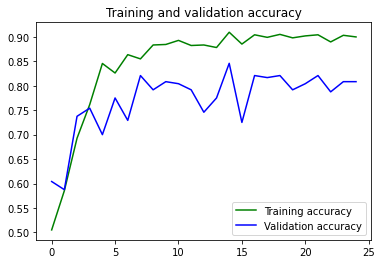

<Figure size 432x288 with 0 Axes>

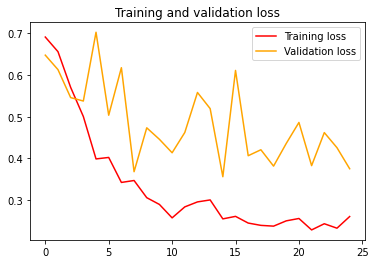

<Figure size 432x288 with 0 Axes>

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

True 0.5911648
With plate


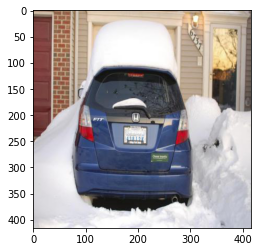

In [12]:
#predicting any random image
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
path = '/content/drive/MyDrive/Colab Notebooks/new/test/plates/3ed000628c6a0587_jpg.rf.ee04a5eaab345281520634902816a9bb.jpg' 
z=plt.imread(path)
plt.imshow(z)
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
print(np.argmax(classes[0])==0, max(classes[0]))
if np.argmax(classes[0])==0 == False:
    print('With plate')
else:
    print('Without plate')

0.53207624
With plate


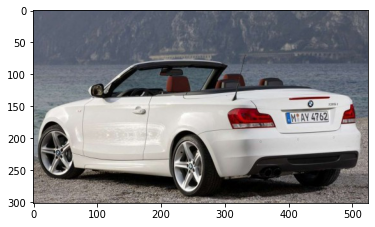

In [25]:
#predicting any random image
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
path = '/content/drive/MyDrive/Colab Notebooks/new/test/plates/01066.jpg' 
z=plt.imread(path)
plt.imshow(z)
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
(np.argmax(classes[0])==0, max(classes[0]))
print(max(classes[0]))
if np.argmax(classes[0])==0 == False:
    print('With plate')
else:
    print('Without plate')

0.6799957
Without plate


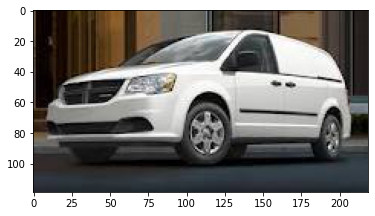

In [23]:
 #predicting any random image
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
path = '/content/drive/MyDrive/Colab Notebooks/new/test/no_plates/00081.jpg' 
z=plt.imread(path)
plt.imshow(z)
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
(np.argmax(classes[0])==0, max(classes[0]))
print(max(classes[0]))
if np.argmax(classes[0])==0 == False:
    print('With plate')
else:
    print('Without plate')

0.6873931
Without plate


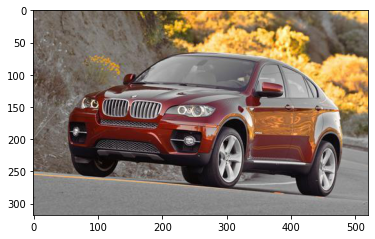

In [24]:
 #predicting any random image
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
path = '/content/drive/MyDrive/Colab Notebooks/new/test/no_plates/00114.jpg' 
z=plt.imread(path)
plt.imshow(z)
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
(np.argmax(classes[0])==0, max(classes[0]))
print(max(classes[0]))
if np.argmax(classes[0])==0 == False:
    print('With plate')
else:
    print('Without plate')

0.83483076
Without plate


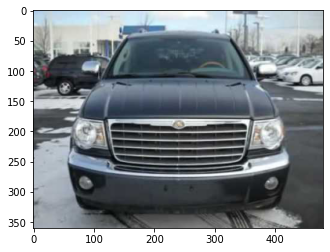

In [30]:
 #predicting any random image
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
path = '/content/drive/MyDrive/Colab Notebooks/new/test/no_plates/00071.jpg' 
z=plt.imread(path)
plt.imshow(z)
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
(np.argmax(classes[0])==0, max(classes[0]))
print(max(classes[0]))
if np.argmax(classes[0])==0 == False:
    print('With plate')
else:
    print('Without plate')